In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model

from sklearn import metrics
df = pd.read_csv("taxi_updated.csv")
df

,Trip_Distance_km,Traffic_Conditions,Weather,Base_Fare,Trip_Duration_Minutes,Trip_Price
0,19.35,1.0,1,3.56,53.82,36.2624
1,36.87,3.0,1,2.70,37.27,52.9032
2,8.64,2.0,1,2.55,89.33,60.2028
3,41.79,3.0,1,4.60,86.95,88.1328
4,9.91,3.0,1,2.32,41.72,28.9914
...,...,...,...,...,...,...
653,40.17,1.0,1,3.81,62.66,56.6394
654,14.34,2.0,1,3.23,45.07,30.7837
655,18.69,2.0,1,4.90,79.41,51.8548
656,5.49,2.0,1,2.39,58.39,34.4049


In [2]:
# check correlations 
corr_m = df.corr()

In [3]:
corr_m['Trip_Price']

Trip_Distance_km         0.862291
Traffic_Conditions       0.100311
Weather                  0.008951
Base_Fare                0.032400
Trip_Duration_Minutes    0.220062
Trip_Price               1.000000
Name: Trip_Price, dtype: float64

In [4]:
df

,Trip_Distance_km,Traffic_Conditions,Weather,Base_Fare,Trip_Duration_Minutes,Trip_Price
0,19.35,1.0,1,3.56,53.82,36.2624
1,36.87,3.0,1,2.70,37.27,52.9032
2,8.64,2.0,1,2.55,89.33,60.2028
3,41.79,3.0,1,4.60,86.95,88.1328
4,9.91,3.0,1,2.32,41.72,28.9914
...,...,...,...,...,...,...
653,40.17,1.0,1,3.81,62.66,56.6394
654,14.34,2.0,1,3.23,45.07,30.7837
655,18.69,2.0,1,4.90,79.41,51.8548
656,5.49,2.0,1,2.39,58.39,34.4049


In [6]:
# splitting the X and Y variabls in other to build and train your model for analysis
# independent variables
X = df.drop(columns = 'Trip_Price')
X

,Trip_Distance_km,Traffic_Conditions,Weather,Base_Fare,Trip_Duration_Minutes
0,19.35,1.0,1,3.56,53.82
1,36.87,3.0,1,2.70,37.27
2,8.64,2.0,1,2.55,89.33
3,41.79,3.0,1,4.60,86.95
4,9.91,3.0,1,2.32,41.72
...,...,...,...,...,...
653,40.17,1.0,1,3.81,62.66
654,14.34,2.0,1,3.23,45.07
655,18.69,2.0,1,4.90,79.41
656,5.49,2.0,1,2.39,58.39


In [7]:
# the dependent variable
y = df['Trip_Price']
y

0      36.2624
1      52.9032
2      60.2028
3      88.1328
4      28.9914
        ...   
653    56.6394
654    30.7837
655    51.8548
656    34.4049
657    61.2090
Name: Trip_Price, Length: 658, dtype: float64

In [8]:
# methodology
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [10]:
# fitting the model
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
# c represents Bo
c = lr.intercept_

In [12]:
c

-13.645515118570131

In [13]:
# m represents B1, B2, B3 ...
m = lr.coef_

In [14]:
m

array([1.76456743, 0.38419877, 0.28175574, 0.76958732, 0.29579621])

In [15]:
y_pred_train = lr.predict(X_train)

In [16]:
y_pred_train

array([103.19185298,  98.934557  ,   4.42438778,  68.9443764 ,
        65.3870624 ,  79.14422148,  15.37239617,  24.12812743,
        44.41897411,  44.19977478,  10.56025599,  73.29892288,
        27.8629755 ,  22.77778183,  84.76067157,  86.29429836,
         6.7418772 ,  16.08568822,  25.57351715,  -1.86440362,
         7.4590322 ,  27.49968659,  20.54333396,  92.37669916,
        59.67500893,  39.82430198,  65.39764174,  79.43830063,
       107.87292446,  49.86123631,  66.95114233,  41.97608115,
        85.50451862,  56.45316592,  73.46658719,  40.28236575,
        -1.52174592,  44.72470419,  80.40872886, 103.62554749,
        93.7959041 ,  48.88735313,  86.9104883 ,  47.760848  ,
        25.52096324,  70.16082714,  21.87103493,   4.04417522,
        84.07512803,  67.01246418,  53.73303797,  52.16812115,
        70.17819456,  52.18570268,  83.84192015,  56.44475089,
        14.97047166,  90.78969188,  38.23334318,  63.73881154,
        60.44394229,  85.7331807 ,  99.92665397,  72.46

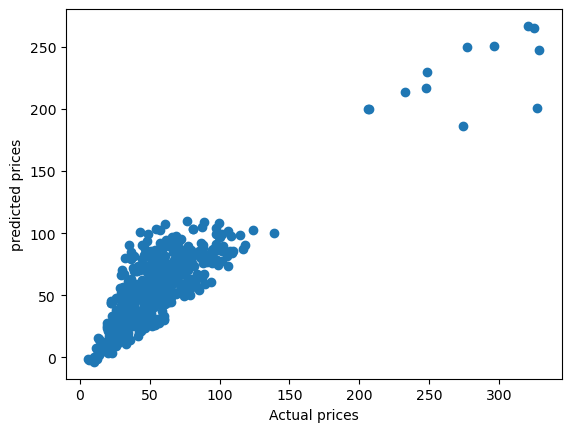

In [17]:
import matplotlib.pyplot as plt
plt.scatter(y_train,y_pred_train)
plt.xlabel('Actual prices')
plt.ylabel('predicted prices')
plt.show()

In [21]:
# how to no how much prediction is good or bad is by showing the accuracy score if it is > 60 is good and if < 60 is not good or bad model
from sklearn.metrics import r2_score

In [22]:
r2_score(y_train,y_pred_train) # our model is good and accurate 

0.7922383562485653

In [23]:
y_pred_test = lr.predict(X_test)

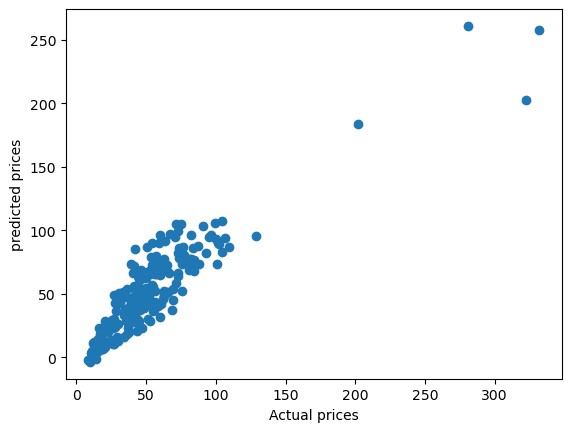

In [24]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred_test)
plt.xlabel('Actual prices')
plt.ylabel('predicted prices')
plt.show()

In [25]:
r2_score(y_test,y_pred_test) # it also shows it is good 

0.8031673312822833

In [26]:
df

,Trip_Distance_km,Traffic_Conditions,Weather,Base_Fare,Trip_Duration_Minutes,Trip_Price
0,19.35,1.0,1,3.56,53.82,36.2624
1,36.87,3.0,1,2.70,37.27,52.9032
2,8.64,2.0,1,2.55,89.33,60.2028
3,41.79,3.0,1,4.60,86.95,88.1328
4,9.91,3.0,1,2.32,41.72,28.9914
...,...,...,...,...,...,...
653,40.17,1.0,1,3.81,62.66,56.6394
654,14.34,2.0,1,3.23,45.07,30.7837
655,18.69,2.0,1,4.90,79.41,51.8548
656,5.49,2.0,1,2.39,58.39,34.4049


In [27]:
#prediction process with 5 independent variables
lr.predict([[19.35,1,1,3.56,53.82]])

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([39.82430198])

In [28]:
#save the model for sharing
import joblib

In [30]:
joblib.dump(lr,'TAXI_PRICE_Trained_model.pkl')

['TAXI_PRICE_Trained_model.pkl']

In [31]:
# to load the model after been shared
model = joblib.load('TAXI_PRICE_Trained_model.pkl')

In [35]:
model.predict([[19.35,1,1,3.56,53.82]])

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([39.82430198])

In [ ]:
#You can see its the same, so this is how to save and load model after been trained and it can be used ant time any day at any moment